In [1]:
#exercise for AQUA's Grover algo/class & CustomCircuitOracle class

import numpy as np
from qiskit import BasicAer
from qiskit.tools.visualization import plot_histogram
from qiskit.aqua import QuantumInstance, run_algorithm
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import CustomCircuitOracle, LogicalExpressionOracle, TruthTableOracle
#clasa de baza Oracle nu merge - abstracta

In [2]:
#prepare quantum and classical registers
qv = QuantumRegister(2, name='variable')
qo = QuantumRegister(1, name='output')
#qa = QuantumRegister(1)
#cr = ClassicalRegister(2)
#prepare quantum circuit
groverCircuit = QuantumCircuit(qv,qo)
#initialize quantum circuit
#groverCircuit.h(qv)
#groverCircuit.h(qo)

In [ ]:
#Oracle for |w> =  |00> ; formed from a CCX gate
#groverCircuit.x(qv)
groverCircuit.ccx(qv[0],qv[1],qo[0])
groverCircuit.x(qv)
# apply H gate
#groverCircuit.h(qv)
#groverCircuit.h(qo)

orcl = CustomCircuitOracle(variable_register=qv,output_register=qo, circuit=groverCircuit,
                           evaluate_classically_callback=lambda m:(m=='00', [1,2]))

In [ ]:
#Oracle for |w> =  |01> ; formed from a CCX gate
groverCircuit.x(qv[0])
groverCircuit.ccx(qv[0],qv[1],qo[0])

orcl = CustomCircuitOracle(variable_register=qv,output_register=qo, circuit=groverCircuit,
                           evaluate_classically_callback=lambda m:(m=='01', [1,2]))

In [ ]:
#Oracle for |w> =  |10> ; formed from a CCX gate
groverCircuit.x(qv[1])
groverCircuit.ccx(qv[0],qv[1],qo[0])

orcl = CustomCircuitOracle(variable_register=qv,output_register=qo, circuit=groverCircuit,
                           evaluate_classically_callback=lambda m:(m=='10', [1,2]))

In [3]:
#Oracle for |w> =  |11> ; formed from a CCX gate
groverCircuit.ccx(qv[0],qv[1],qo[0])

orcl = CustomCircuitOracle(variable_register=qv,output_register=qo, circuit=groverCircuit,
                           evaluate_classically_callback=lambda m:(m=='11', [1,2]))

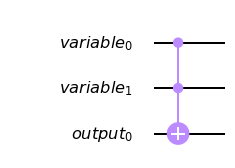

In [4]:
groverCircuit.draw(output="mpl")

In [5]:
#use oracle to create a grover instance
grover = Grover(orcl)

In [6]:
#use the qasm simulator backend and run grover instance
backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)
result = grover.run(quantum_instance)
print(result['result'])

[1, 2]


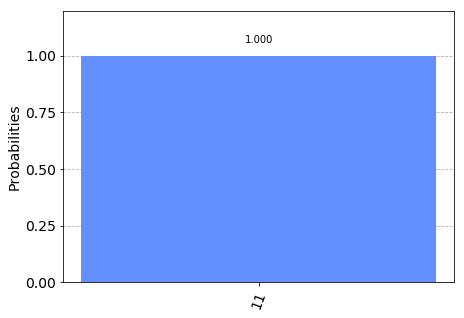

In [7]:
plot_histogram(result['measurement'])